In [1]:
import pandas as pd
import json
import os

In [2]:
with open('categorized_tasks-gpt-4o-gpt-4o-retail.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,Task id,procedural,declarative,reason
0,0,Yes,Yes,The conversation involves two main tasks: EXCH...
1,1,Yes,Yes,The conversation involves both procedural and ...
2,2,Yes,Yes,The conversation involves two main tasks: SHOW...
3,3,Yes,Yes,The conversation involves two main tasks: SHOW...
4,4,Yes,Yes,The conversation includes two main tasks: SHOW...


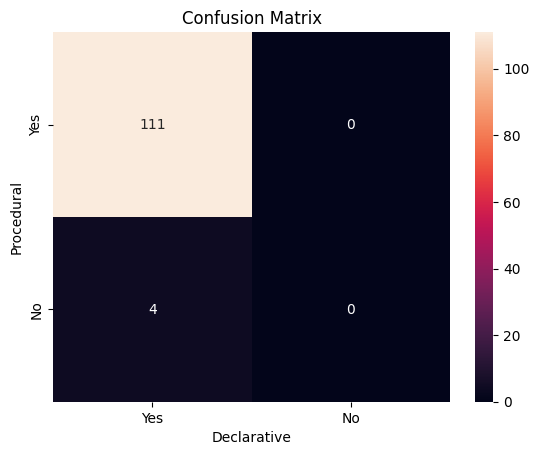

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(df['procedural'], df['declarative'], labels=['Yes', 'No'])

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Declarative')
plt.ylabel('Procedural')
plt.title('Confusion Matrix')
plt.show()

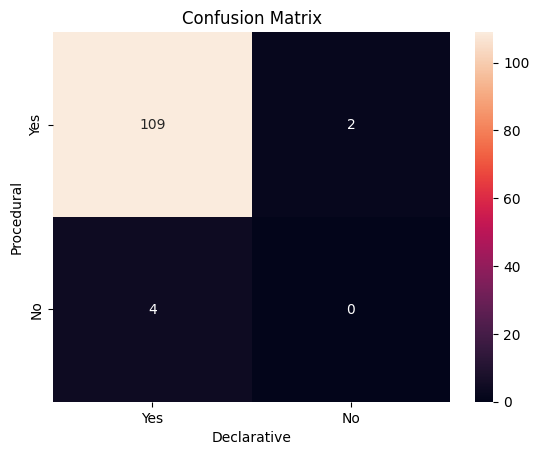

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(df['procedural'], df['declarative'], labels=['Yes', 'No'])

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Declarative')
plt.ylabel('Procedural')
plt.title('Confusion Matrix')
plt.show()

In [6]:
# Sample 5 rows for each combination of procedural and declarative
sampled_df = df.groupby(['procedural', 'declarative']).apply(lambda x: x.sample(n=5, random_state=2) if len(x) >= 5 else x).reset_index(drop=True)
sampled_df

/var/folders/nr/1tw88k6s4xg8ng602yz6f4h00000gn/T/ipykernel_17386/2254232767.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(['procedural', 'declarative']).apply(lambda x: x.sample(n=5, random_state=2) if len(x) >= 5 else x).reset_index(drop=True)


,Task id,procedural,declarative,reason
0,56,No,Yes,The user is asking a question about the order ...
1,68,No,Yes,The user is asking a question to get informati...
2,50,No,Yes,The user is requesting information and assista...
3,67,No,Yes,The user is asking a question to get informati...
4,5,No,Yes,The user is trying to initiate an exchange and...
5,53,Yes,No,The user is initiating a return and the assist...
6,58,Yes,No,"The user is performing an exchange order, whic..."
7,94,Yes,No,"The user is trying to exchange an order, which..."
8,103,Yes,No,The conversation includes multiple tasks: MODI...
9,83,Yes,No,"The user is initiating a return order, which i..."


In [7]:
df["group"] = "P_" + df["procedural"] + "-" + "D_" + df["declarative"]

In [8]:
with open("/Users/rishitoshsingh/Documents/projects/applied/tau-bench/historical_trajectories/gpt-4o-retail.json", 'r') as f:
    original_data = json.load(f)

In [9]:
df.dtypes

Task id         int64
procedural     object
declarative    object
reason         object
group          object
dtype: object

In [10]:
original_df = pd.DataFrame(original_data)
original_df.drop_duplicates(subset=["task_id"], inplace=True)
# original_df.drop(columns=["traj"], inplace=True)
original_df

,task_id,reward,info,traj,trial
0,0,1.0,"{'task': {'user_id': 'yusuf_rossi_9620', 'acti...","[{'role': 'system', 'content': '# Retail agent...",0
1,1,1.0,"{'task': {'user_id': 'yusuf_rossi_9620', 'acti...","[{'role': 'system', 'content': '# Retail agent...",0
2,2,1.0,"{'task': {'user_id': 'yusuf_rossi_9620', 'acti...","[{'role': 'system', 'content': '# Retail agent...",0
3,3,1.0,"{'task': {'user_id': 'yusuf_rossi_9620', 'acti...","[{'role': 'system', 'content': '# Retail agent...",0
4,4,1.0,"{'task': {'user_id': 'yusuf_rossi_9620', 'acti...","[{'role': 'system', 'content': '# Retail agent...",0
...,...,...,...,...,...
110,110,0.0,"{'task': {'user_id': 'sophia_martin_8570', 'ac...","[{'role': 'system', 'content': '# Retail agent...",0
111,111,0.0,"{'task': {'user_id': 'sophia_martin_8570', 'ac...","[{'role': 'system', 'content': '# Retail agent...",0
112,112,0.0,"{'task': {'user_id': 'yara_silva_7567', 'actio...","[{'role': 'system', 'content': '# Retail agent...",0
113,113,1.0,"{'task': {'user_id': 'yara_silva_7567', 'actio...","[{'role': 'system', 'content': '# Retail agent...",0


In [11]:
original_df = original_df.merge(df[["Task id","group", "reason"]], left_on="task_id", right_on="Task id", how="inner").drop(columns=["Task id"])

In [12]:
df_grouped_json = (
    original_df.groupby('group')
    .apply(lambda x: x.drop(columns='group').to_dict(orient='records'))
    .to_dict()
)
for key in df_grouped_json.keys():
    print(f"{key}: {len(df_grouped_json[key])} tasks")

P_No-D_Yes: 5 tasks
P_Yes-D_No: 36 tasks
P_Yes-D_Yes: 74 tasks


/var/folders/nr/1tw88k6s4xg8ng602yz6f4h00000gn/T/ipykernel_17386/4065921992.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.drop(columns='group').to_dict(orient='records'))


In [13]:
import os
os.makedirs('final', exist_ok=True)

for key in df_grouped_json.keys():
    with open(f'final/gemini-2.0-flash-gpt-4o-retail-{key}.json', 'w') as f:
        json.dump(df_grouped_json[key], f, indent=4)